# Data Cleaning



## Objectives

After completing this lab you will be able to:

*   Use Log function to transform the data
*   Handle the duplicates
*   Handle the missing values
*   Standardize and normalize the data
*   Handle the outliers



***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for machine learning and machine-learning-pipeline related functions.


In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler#mean norm (x-mean)/std   2/3 of data in range -1 to 1 and mean =0
from sklearn.preprocessing import MinMaxScaler#range from 0 to 1



## **Reading and understanding our data**


For this lab, we will be using the Ames_Housing_Data.tsv file, hosted on IBM Cloud object storage. The Ames housing dataset examines features of houses sold in Ames (a small city in the state of Iowa in the United States) during the 2006–2010 timeframe.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [2]:
housing = pd.read_csv("Ames_Housing_Data1.tsv", sep='\t')
print(housing.shape)
housing.head(10)

(2931, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


We can find more information about the features and types using the `info()`  method.


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

According to the output above, we have 2931 entries, 0 to 2930, as well as 81 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 2931 then there is no missing values for that particular feature. 'SalePrice' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (28 int64 and 11 float64) and object data types. 


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [7]:
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section. 


## Exercise 1


The `describe()` function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use `value_counts()` function. In this exercise, describe all categories of the 'Sale Condition' attribute.


In [9]:
housing["Sale Condition"].value_counts()

Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


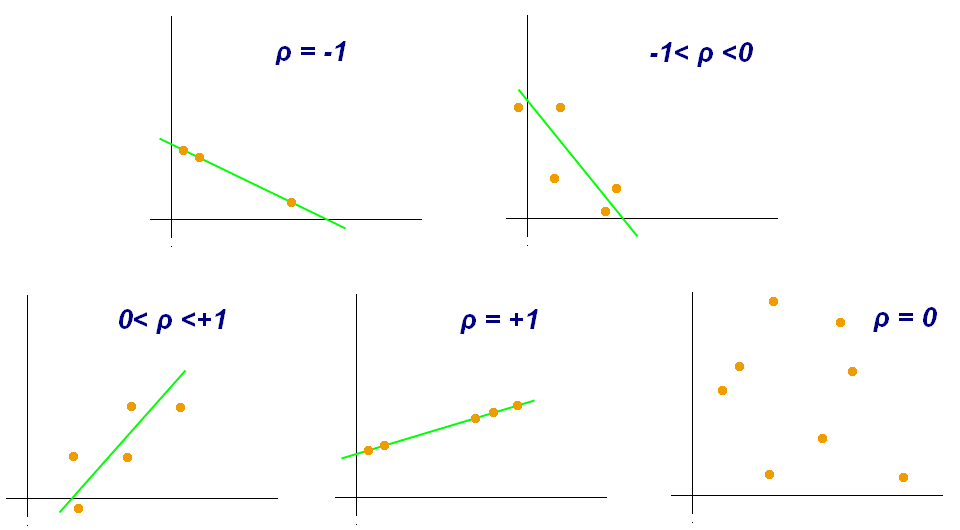

In [3]:
hous_num = housing.select_dtypes(include = ['float64', 'int64'])
hous_num 


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
2,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
4,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2927,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2928,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,80,32,0,0,0,0,700,7,2006,132000
2929,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [5]:
hous_num.columns

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [13]:
hous_num.columns[0]

'Order'

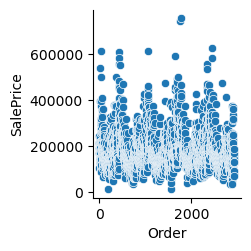

In [8]:
 sns.pairplot(data=hous_num,
                 x_vars='Order',
                 y_vars='SalePrice')

In [47]:
hous_num.columns[0:2]

Index(['Order', 'PID'], dtype='object')

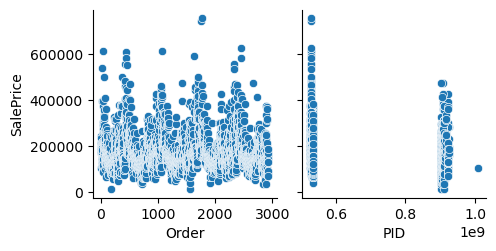

In [9]:
 sns.pairplot(data=hous_num,
                 x_vars=['Order', 'PID'], # Order and PID 
                 y_vars='SalePrice')

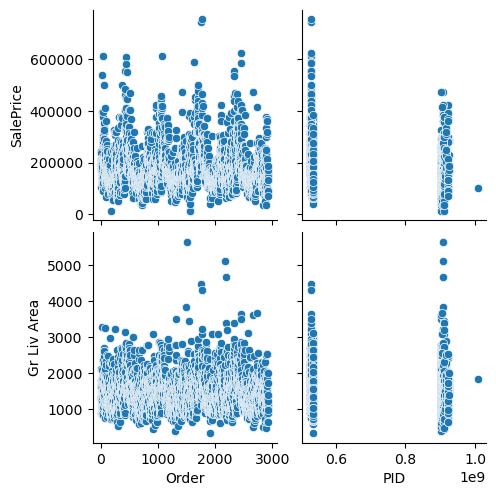

In [10]:
 sns.pairplot(data=hous_num,
                 x_vars=hous_num.columns[0:2], # Order and PID
                 y_vars=['SalePrice',"Gr Liv Area"])

Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


## all data correlation

In [18]:
len(hous_num.columns)

39

In [20]:
hous_num.columns[5:10]

Index(['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area'],
      dtype='object')

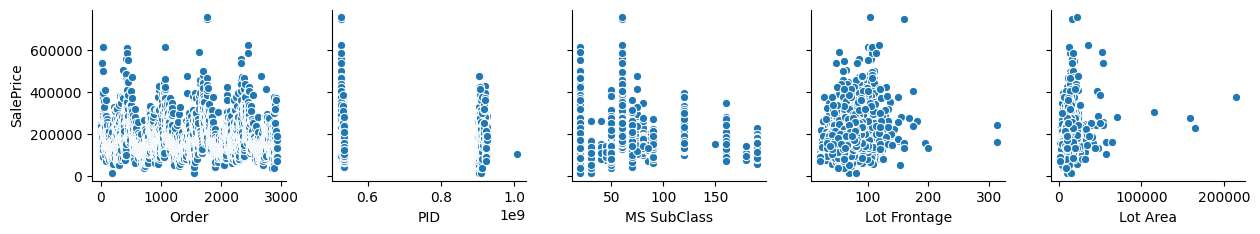

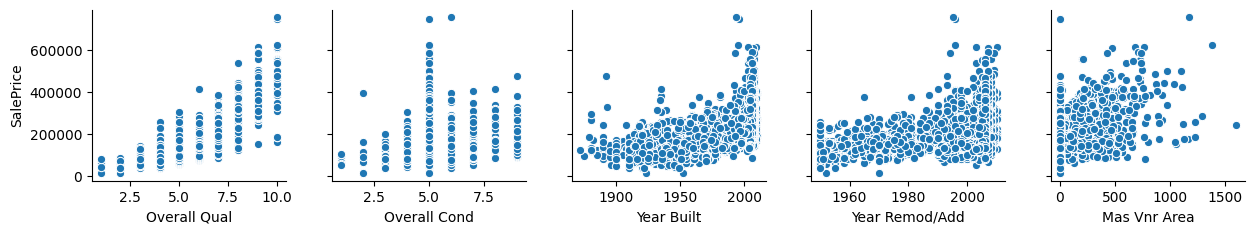

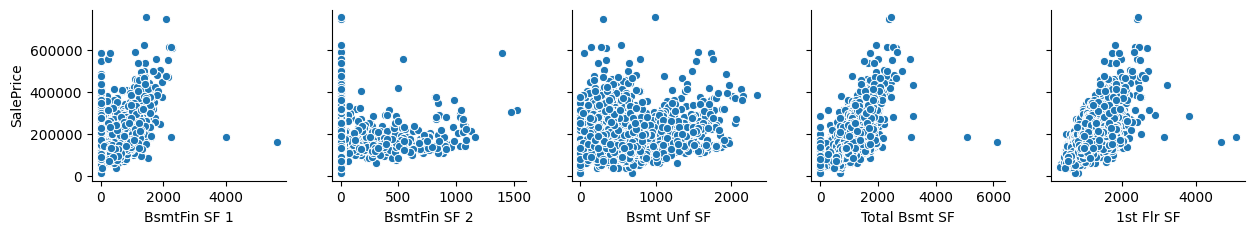

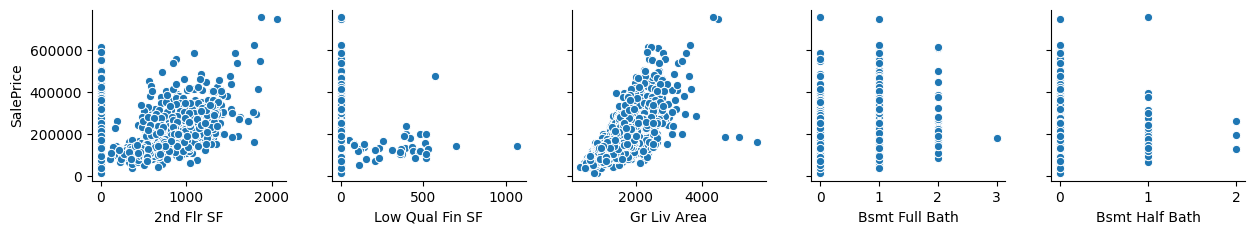

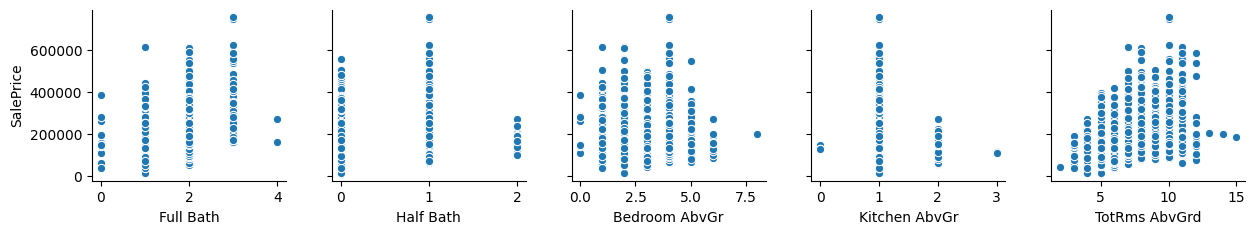

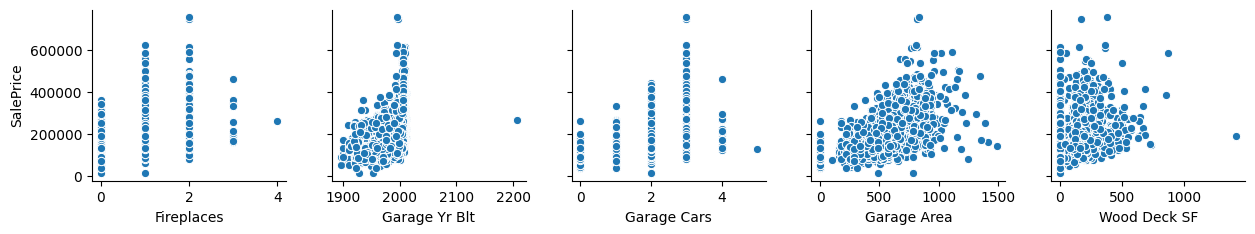

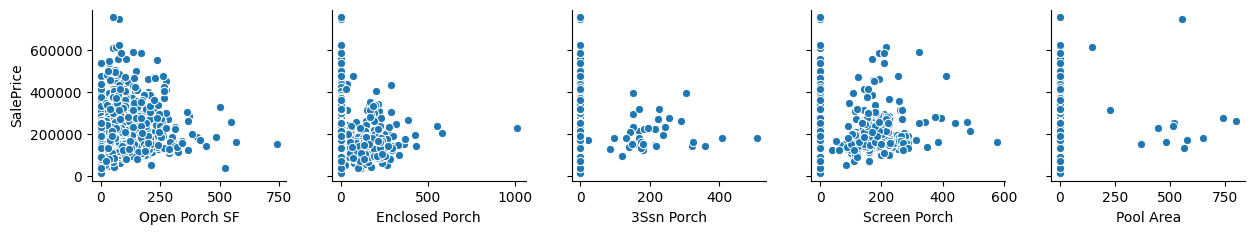

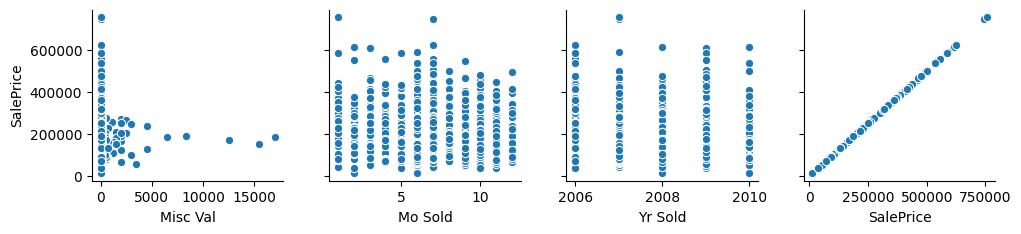

In [21]:
for i in range(0, len(hous_num.columns), 5):#i=5  len(39)   i=0,5,10,15,35
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5], # x_vars=hous_num.columns[5:10]
                y_vars=['SalePrice'])

## another way using subplot and scatter plot

In [22]:
len(hous_num.columns)

39

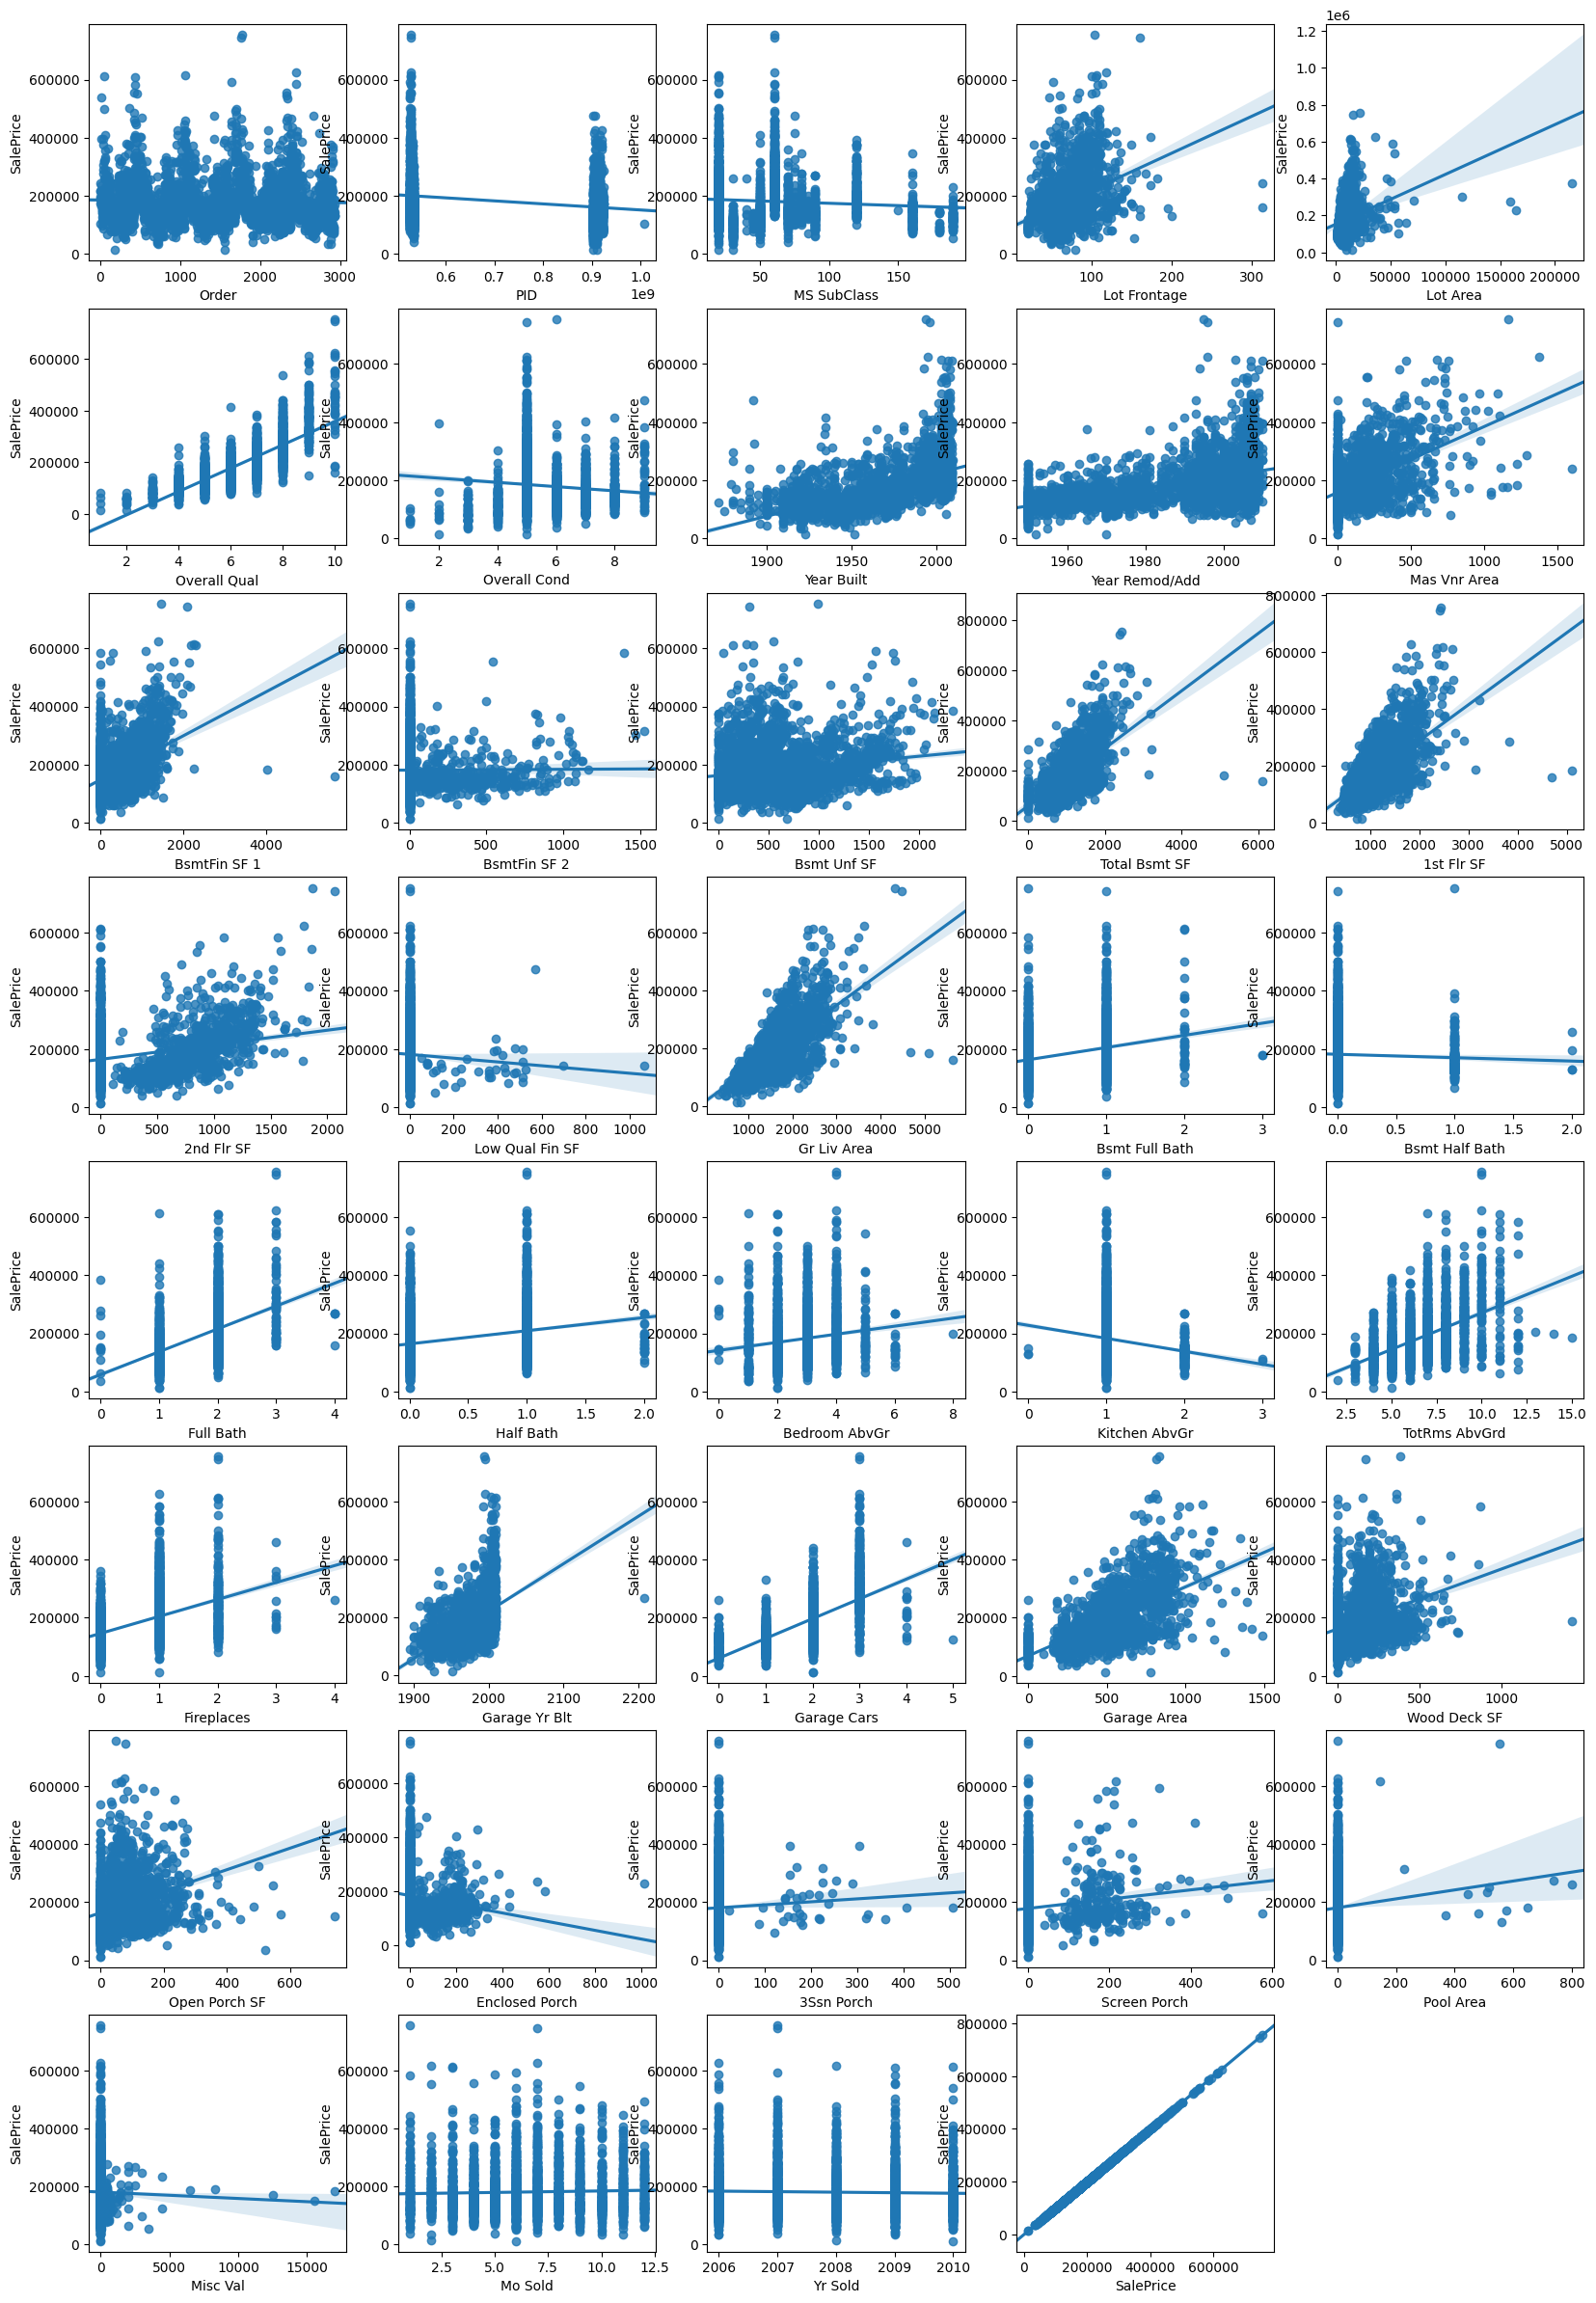

In [23]:
plt.figure(figsize = [20, 30])
# example of somewhat too-large bin size
for i in range(len(hous_num.columns)): #range 0 to 38
    plt.subplot(8, 5, 1+i)
    sns.regplot(data = hous_num, x =hous_num.columns[i], y = 'SalePrice');
    plt.xlabel(hous_num.columns[i]);
    plt.ylabel('SalePrice');
   

## most  correlated data

In [24]:
hous_num_corr = hous_num.corr()['SalePrice']
hous_num_corr

Order             -0.031644
PID               -0.246617
MS SubClass       -0.085206
Lot Frontage       0.357141
Lot Area           0.266600
Overall Qual       0.799226
Overall Cond      -0.101763
Year Built         0.558340
Year Remod/Add     0.532664
Mas Vnr Area       0.508277
BsmtFin SF 1       0.432950
BsmtFin SF 2       0.005848
Bsmt Unf SF        0.182808
Total Bsmt SF      0.632270
1st Flr SF         0.621672
2nd Flr SF         0.269222
Low Qual Fin SF   -0.037673
Gr Liv Area        0.706791
Bsmt Full Bath     0.276144
Bsmt Half Bath    -0.035870
Full Bath          0.545339
Half Bath          0.284909
Bedroom AbvGr      0.143934
Kitchen AbvGr     -0.119839
TotRms AbvGrd      0.495500
Fireplaces         0.474481
Garage Yr Blt      0.526808
Garage Cars        0.647891
Garage Area        0.640411
Wood Deck SF       0.327220
Open Porch SF      0.312970
Enclosed Porch    -0.128833
3Ssn Porch         0.032209
Screen Porch       0.112104
Pool Area          0.068392
Misc Val          -0

In [27]:
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays  correlation coefficient greater than 0.5
top_features

SalePrice         1.000000
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64

In [28]:
top_features.index

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area'],
      dtype='object')

Above, there are 11 features, with coefficients greater than 0.5, that are strongly correlated with the sale price. 


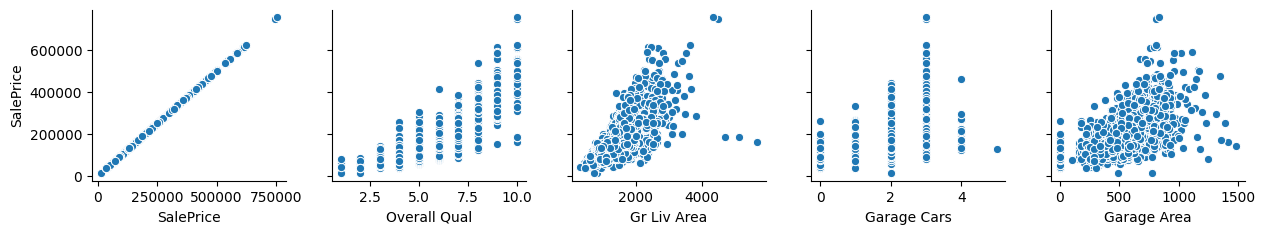

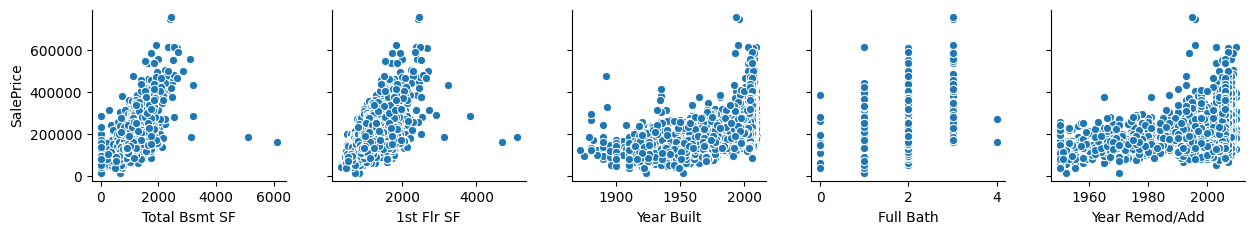

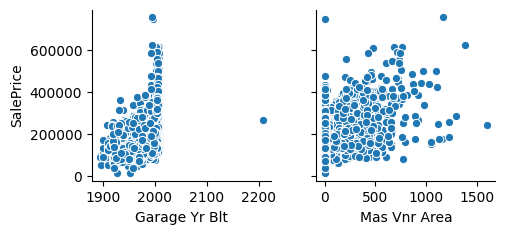

In [29]:
for i in range(0, len(top_features.index), 5):
    sns.pairplot(data=hous_num,
                x_vars=top_features.index[i:i+5],
                y_vars=['SalePrice'])

## another way using subplot and scatter plot

In [30]:
len(top_features.index)

12

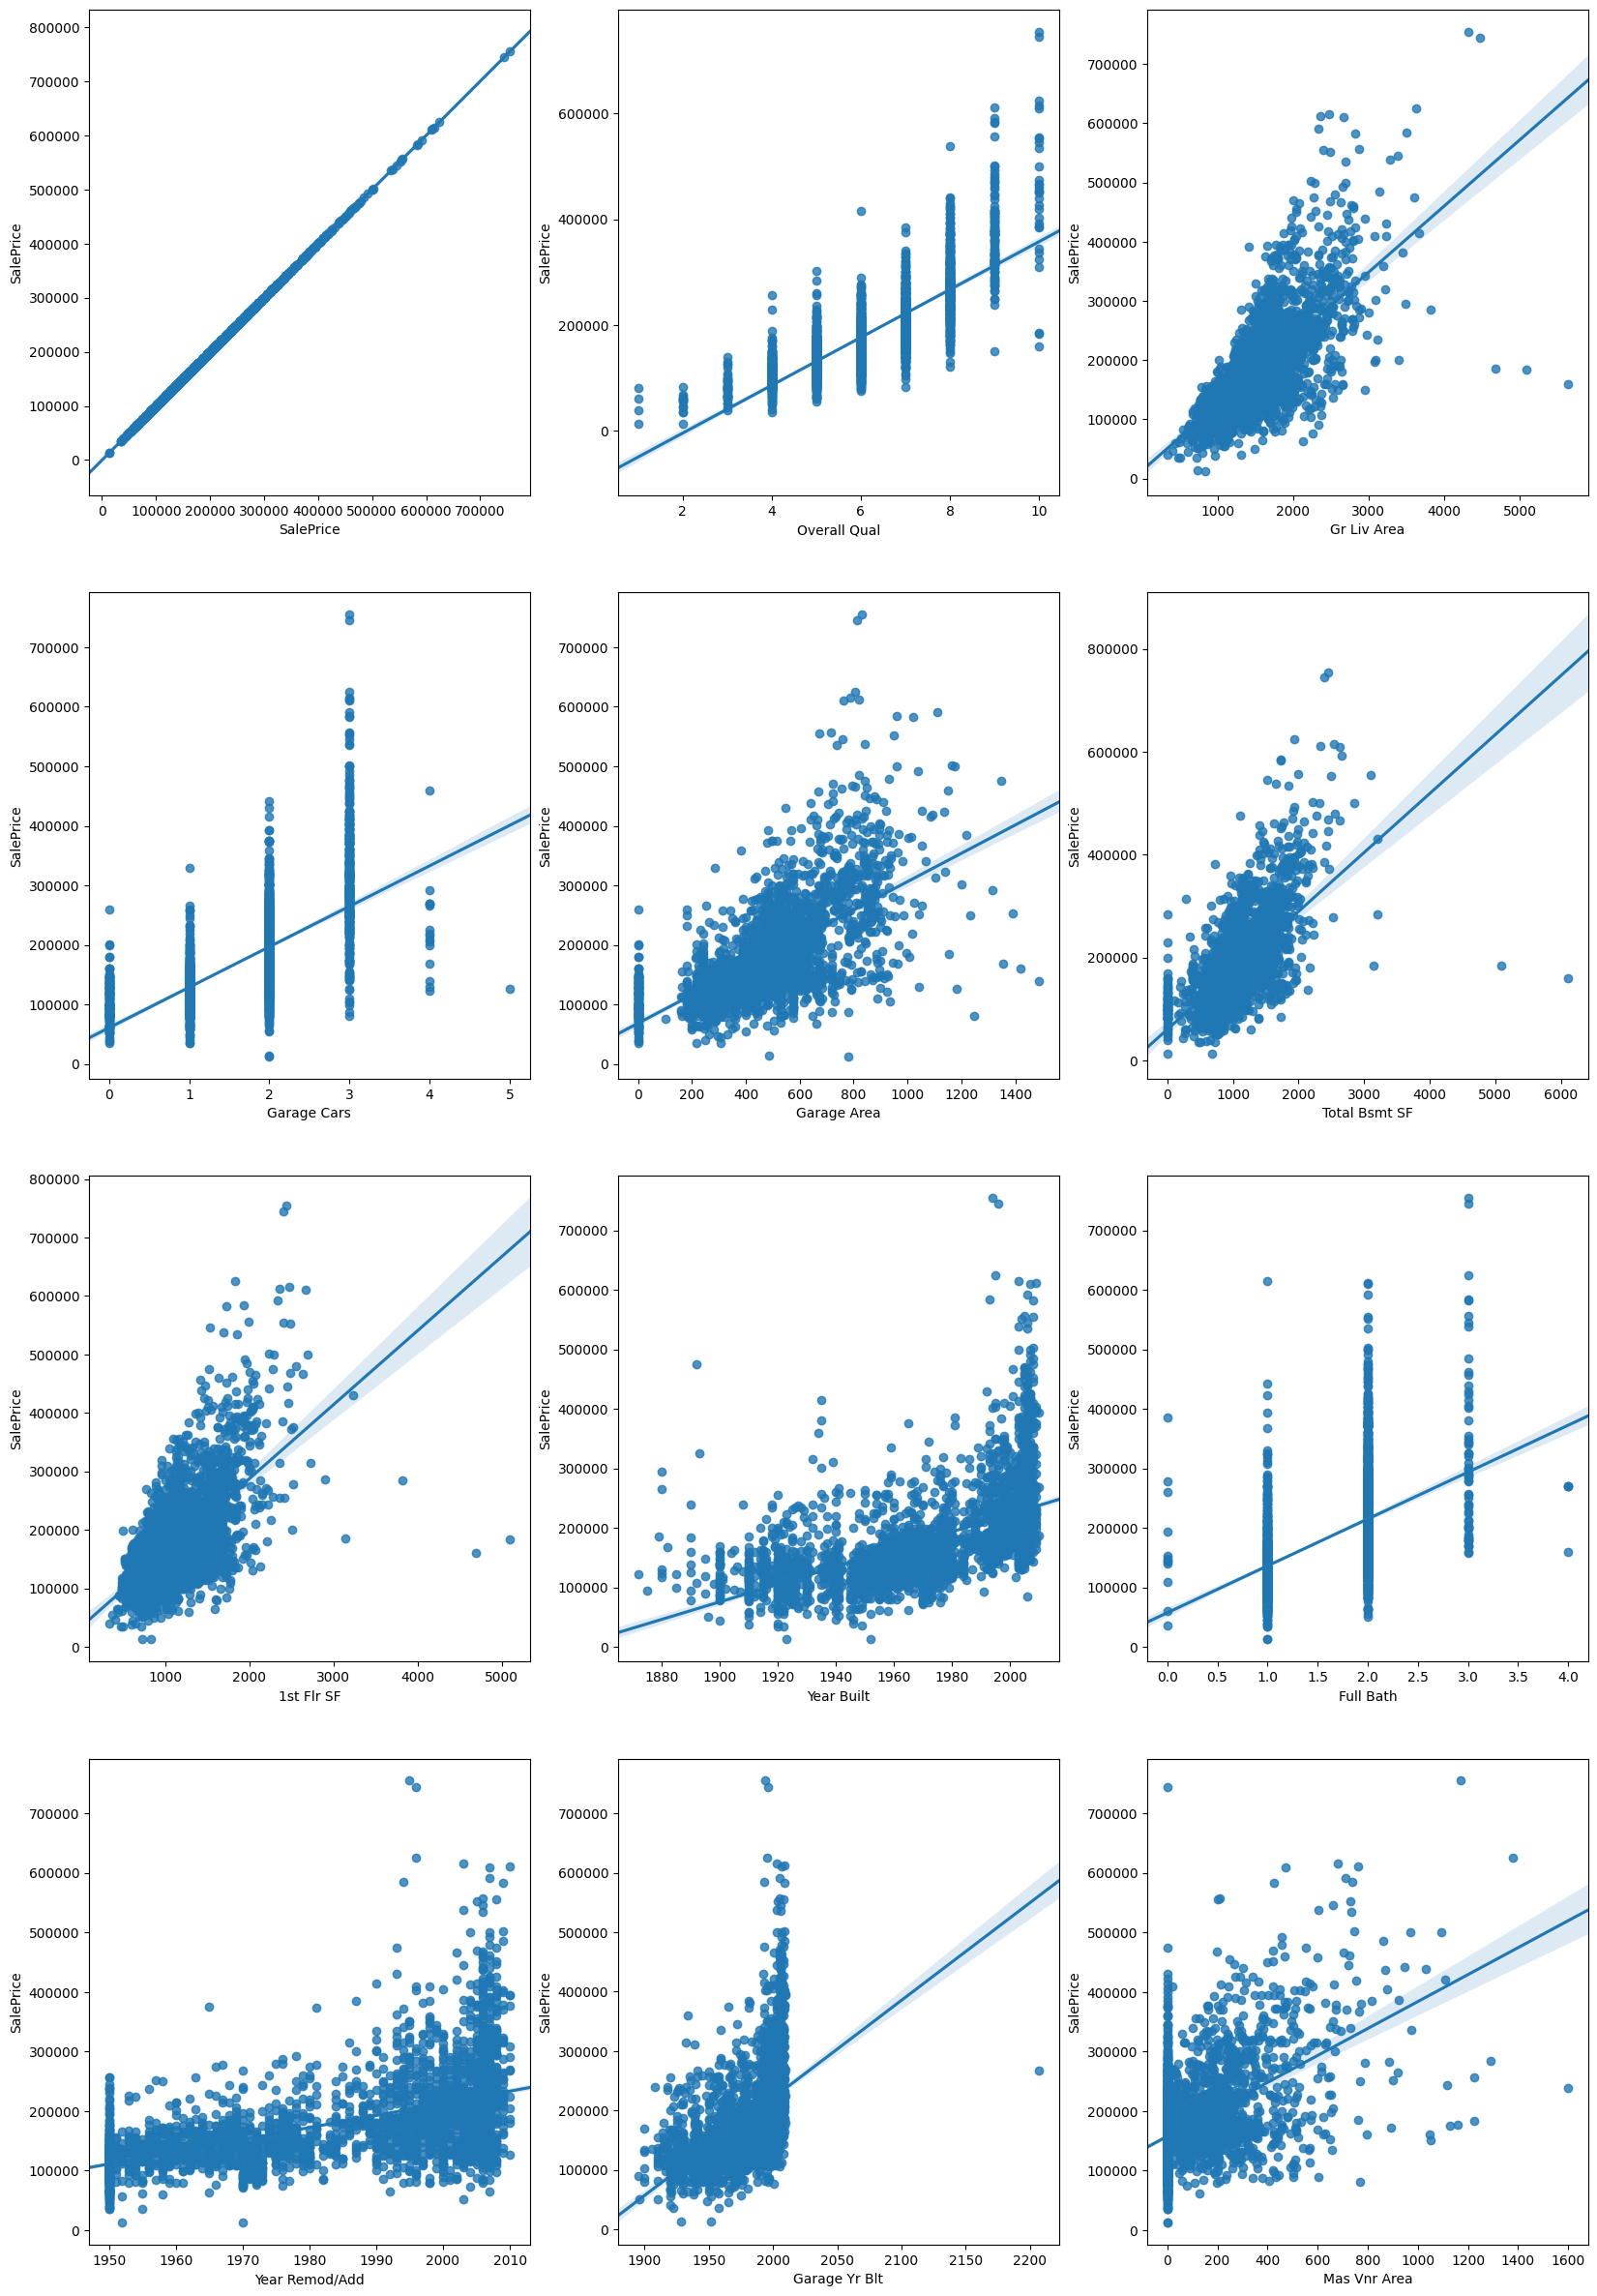

In [31]:
plt.figure(figsize = [20, 30])
# example of somewhat too-large bin size
for i in range(len(top_features.index)):
    plt.subplot(4, 3, 1+i)
    sns.regplot(data = hous_num, x =top_features.index[i], y = 'SalePrice');
    plt.xlabel(top_features.index[i]);
    plt.ylabel('SalePrice');

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'SalePrice' distribution using the `distplot()` function from the `seaborn` library.


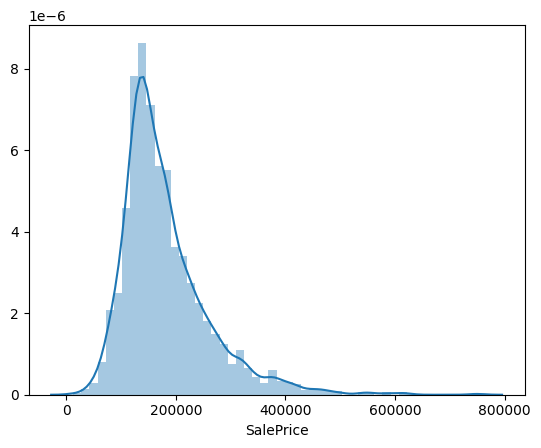

In [33]:
sp_untransformed = sns.distplot(housing['SalePrice'])

As the plot shows, our 'SalePrice' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution.


Here, we can simply use the `skew()` function to calculate our skewness level of the `SalePrice`.


In [34]:
print("Skewness:", housing['SalePrice'].skew())

Skewness: 1.743221853159165


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data. 

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) contains more information about the numpy log transform.


In [46]:
log_transformed = np.log(housing['SalePrice'])

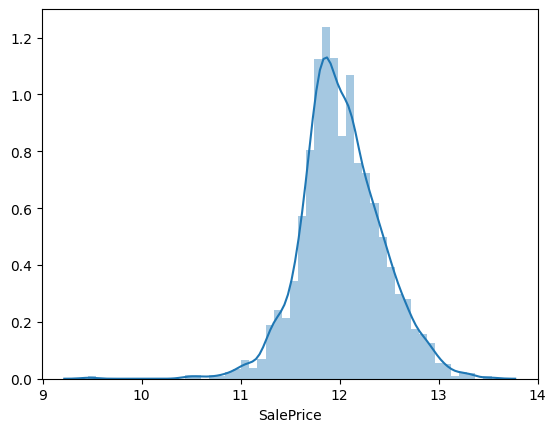

In [48]:
sp_transformed = sns.distplot(log_transformed)

In [50]:
print("Skewness:" ,log_transformed.skew())

Skewness: -0.015353828434352058


As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range. 



## Exercise 2


In this exercise, visually inspect the 'Lot Area' feature. If there is any skewness present, apply log transform to make it more normally distributed.


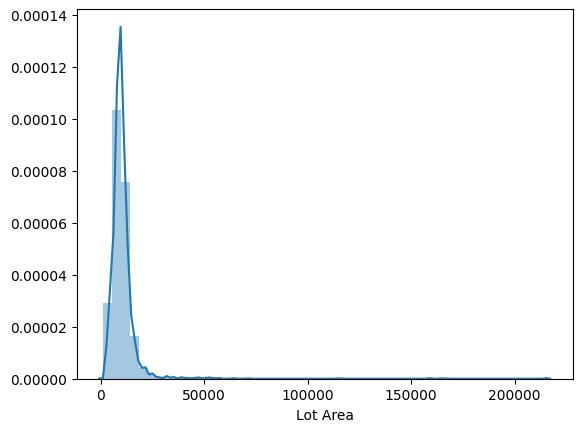

In [51]:
la_untansformed = sns.distplot(housing['Lot Area'])

In [52]:
print("Skewness: " ,(housing['Lot Area']).skew())

Skewness:  12.778040640965061


In [53]:
la_log = np.log(housing['Lot Area'])

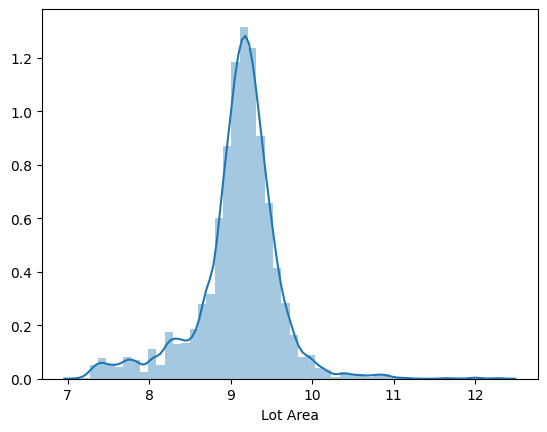

In [56]:
la_tansformed = sns.distplot(la_log)

In [57]:
print("Skewness: " ,la_log.skew())

Skewness:  -0.49463880686275796


## **Handling the Duplicates**


As mentioned in the video, having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function and search by the 'PID' column, which contains a unique index number for each entry.


In [58]:
duplicat=housing.duplicated(['PID'])
duplicat

0       False
1        True
2       False
3       False
4       False
        ...  
2926    False
2927    False
2928    False
2929    False
2930    False
Length: 2931, dtype: bool

In [59]:
duplicat_index=duplicat[duplicat==True].index
duplicat_index

Int64Index([1], dtype='int64')

In [60]:
housing.loc[duplicat_index,:]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [61]:
dup_removed=housing.drop(duplicat_index,axis=0)#out of place
dup_removed

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## short way

In [62]:
duplicate = housing[housing.duplicated(subset=['PID'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


As we can see, there is one duplicate row in this dataset. To remove it, we can use pandas `drop_duplicates()` function. By default, it removes all duplicate rows based on all the columns.


In [65]:
dup_removed = housing.drop_duplicates() #out of place
dup_removed 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [67]:
housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


An alternative way to check if there are any duplicated Indexes in our dataset is using `index.is_unique` function.


In [68]:
housing["PID"].is_unique

False

In [70]:
dup_removed["PID"].is_unique

True

## Exercise 3


In this exercise try to remove duplicates on a specific column by setting the subset equal to the column that contains the duplicate, such as 'Order'.


In [71]:
duplicate_ord = housing[housing.duplicated(['Order'])]
duplicate_ord

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [73]:
removed_sub = housing.drop_duplicates(subset=['Order'])
removed_sub

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## **Handling the Missing Values**


### Finding the Missing Values


To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the `bar plot` function from the `matplotlib` library.


In [96]:
total = housing.isnull()
total

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2929,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False


In [97]:
total.sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In [98]:
total.sum().sort_values(ascending=False)

Pool QC         2918
Misc Feature    2825
Alley           2733
Fence           2359
Fireplace Qu    1422
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

In [99]:
total_select=total.sum().sort_values(ascending=False)[0:20]
total_select

Pool QC           2918
Misc Feature      2825
Alley             2733
Fence             2359
Fireplace Qu      1422
Garage Finish      159
Garage Cond        159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
dtype: int64

## as one step

Text(0.5, 1.0, 'Total Missing Values')

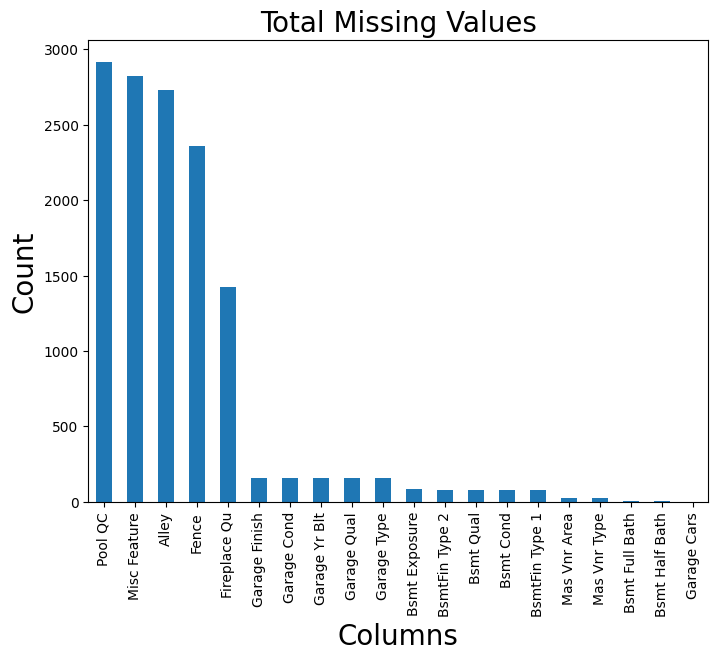

In [100]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)#pandas

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

## relative frequency

In [101]:
count_data=housing.shape[0]
count_data

2931

In [102]:
total_select = (total.head(20)/count_data)*100
total_select

Pool QC           99.556465
Misc Feature      96.383487
Alley             93.244626
Fence             80.484476
Fireplace Qu      48.515865
Garage Finish      5.424770
Garage Cond        5.424770
Garage Yr Blt      5.424770
Garage Qual        5.424770
Garage Type        5.356534
Bsmt Exposure      2.831798
BsmtFin Type 2     2.763562
Bsmt Qual          2.729444
Bsmt Cond          2.729444
BsmtFin Type 1     2.729444
Mas Vnr Area       0.784715
Mas Vnr Type       0.784715
Bsmt Full Bath     0.068236
Bsmt Half Bath     0.068236
Garage Cars        0.034118
dtype: float64

Text(0.5, 1.0, 'Total Missing Values')

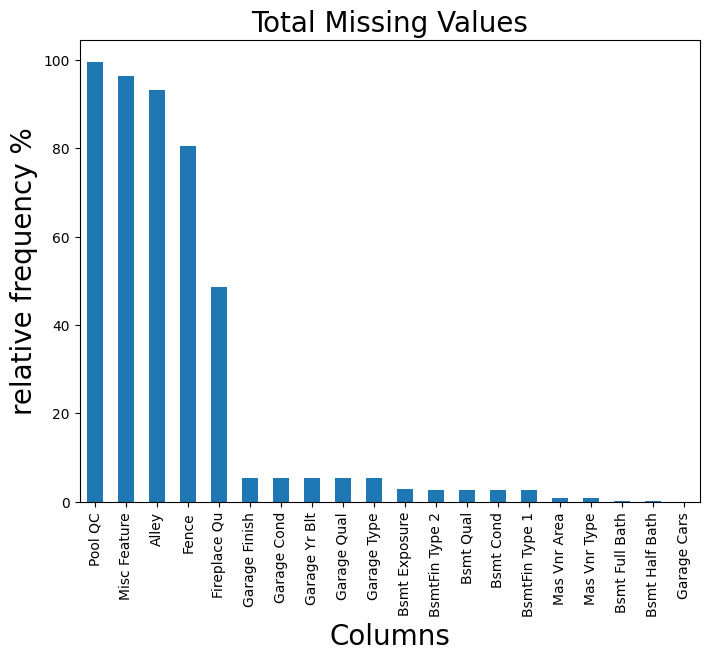

In [103]:
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("relative frequency %", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.


1. We can drop the missing values, using `dropna()` method.


In [104]:
housing.dropna(subset=["Lot Frontage"])

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Using this method, all the rows, containing null values in 'Lot Frontage' feature, for example, will be dropped. 


2. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.


In [105]:
housing.drop("Pool QC", axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,0,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,0,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,0,4,2006,WD,Normal,170000


In [106]:
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


Using this method, the entire column containing the null values will be dropped. 


3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.


In [107]:
median = housing["Lot Frontage"].median()
median

68.0

In [108]:
housing["Lot Frontage"].fillna(median, inplace = True)

In [109]:
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


Index# 2927, containing a missing value in the "Lot Frontage", now has been replaced with the median value.


## Exercise 4


In this exercise, let's look at 'Mas Vnr Area' feature and replace the missing values with the mean value of that column.


In [111]:
mean = housing["Mas Vnr Area"].mean()
housing["Mas Vnr Area"].fillna(mean, inplace = True)  

## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.



Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) please visit their respective documentation websites. 


First, we will normalize our data.


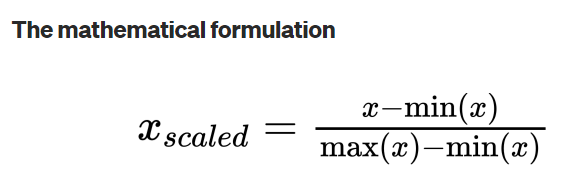

In [112]:
housing_minmax=housing.copy()
housing_stand=housing.copy()

In [113]:
housing_minmax[hous_num.columns]=MinMaxScaler().fit_transform(housing_minmax[hous_num.columns])
housing_minmax

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.000000,0.000000,0.000000,RL,0.410959,0.142420,Pave,NaN,IR1,Lvl,...,0.0,NaN,NaN,NaN,0.000000,0.363636,1.0,WD,Normal,0.272444
1,0.000000,0.000000,0.000000,RL,0.410959,0.142420,Pave,NaN,IR1,Lvl,...,0.0,NaN,NaN,NaN,0.000000,0.363636,1.0,WD,Normal,0.272444
2,0.000341,0.000102,0.000000,RH,0.202055,0.048246,Pave,NaN,Reg,Lvl,...,0.0,NaN,MnPrv,NaN,0.000000,0.454545,1.0,WD,Normal,0.124238
3,0.000683,0.000104,0.000000,RL,0.205479,0.060609,Pave,NaN,IR1,Lvl,...,0.0,NaN,NaN,Gar2,0.735294,0.454545,1.0,WD,Normal,0.214509
4,0.001024,0.000108,0.000000,RL,0.246575,0.046087,Pave,NaN,Reg,Lvl,...,0.0,NaN,NaN,NaN,0.000000,0.272727,1.0,WD,Normal,0.311517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,0.998634,0.825655,0.352941,RL,0.054795,0.031022,Pave,NaN,IR1,Lvl,...,0.0,NaN,GdPrv,NaN,0.000000,0.181818,0.0,WD,Normal,0.174763
2927,0.998976,0.825657,0.000000,RL,0.160959,0.035453,Pave,NaN,IR1,Low,...,0.0,NaN,MnPrv,NaN,0.000000,0.454545,0.0,WD,Normal,0.159269
2928,0.999317,0.825915,0.382353,RL,0.140411,0.042726,Pave,NaN,Reg,Lvl,...,0.0,NaN,MnPrv,Shed,0.041176,0.545455,0.0,WD,Normal,0.160616
2929,0.999659,0.827371,0.000000,RL,0.191781,0.040711,Pave,NaN,Reg,Lvl,...,0.0,NaN,NaN,NaN,0.000000,0.272727,0.0,WD,Normal,0.211814


we can also standardize our data.


In [114]:
housing_stand[hous_num.columns]=StandardScaler().fit_transform(housing_stand[hous_num.columns])
housing_stand

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-1.730280,-0.996824,-0.876740,RL,3.368624,2.740394,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.447966,1.677407,WD,Normal,0.428142
1,-1.730280,-0.996824,-0.876740,RL,3.368624,2.740394,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.447966,1.677407,WD,Normal,0.428142
2,-1.729098,-0.996565,-0.876740,RH,0.512892,0.185954,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,MnPrv,NaN,-0.089407,-0.079460,1.677407,WD,Normal,-0.949235
3,-1.727916,-0.996560,-0.876740,RL,0.559707,0.521297,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,NaN,Gar2,21.989477,-0.079460,1.677407,WD,Normal,-0.110287
4,-1.726734,-0.996549,-0.876740,RL,1.121490,0.127380,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.816472,1.677407,WD,Normal,0.791269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,1.726733,1.106924,0.530750,RL,-1.500165,-0.281244,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,GdPrv,NaN,-0.089407,-1.184978,-1.360270,WD,Normal,-0.479674
2927,1.727915,1.106929,-0.876740,RL,-0.048892,-0.161053,Pave,NaN,IR1,Low,...,-0.06302,NaN,MnPrv,NaN,-0.089407,-0.079460,-1.360270,WD,Normal,-0.623673
2928,1.729097,1.107586,0.648041,RL,-0.329783,0.036222,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,MnPrv,Shed,1.147011,0.289047,-1.360270,WD,Normal,-0.611151
2929,1.730279,1.111296,-0.876740,RL,0.372446,-0.018422,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.816472,-1.360270,WD,Normal,-0.135330


## Exercise 5


In this exercise, use `StandardScaler()` and `fit_transform()` functions to standardize the 'SalePrice' feature only.


In [115]:
housing_stand[['SalePrice']]

,SalePrice
0,0.428142
1,0.428142
2,-0.949235
3,-0.110287
4,0.791269
...,...
2926,-0.479674
2927,-0.623673
2928,-0.611151
2929,-0.135330


In [117]:
housing_stand['SalePrice']=StandardScaler().fit_transform(housing_stand[['SalePrice']]) #fit_transform deal  with 2d array or DF
housing_stand

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,-1.730280,-0.996824,-0.876740,RL,3.368624,2.740394,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.447966,1.677407,WD,Normal,0.428142
1,-1.730280,-0.996824,-0.876740,RL,3.368624,2.740394,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.447966,1.677407,WD,Normal,0.428142
2,-1.729098,-0.996565,-0.876740,RH,0.512892,0.185954,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,MnPrv,NaN,-0.089407,-0.079460,1.677407,WD,Normal,-0.949235
3,-1.727916,-0.996560,-0.876740,RL,0.559707,0.521297,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,NaN,Gar2,21.989477,-0.079460,1.677407,WD,Normal,-0.110287
4,-1.726734,-0.996549,-0.876740,RL,1.121490,0.127380,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.816472,1.677407,WD,Normal,0.791269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,1.726733,1.106924,0.530750,RL,-1.500165,-0.281244,Pave,NaN,IR1,Lvl,...,-0.06302,NaN,GdPrv,NaN,-0.089407,-1.184978,-1.360270,WD,Normal,-0.479674
2927,1.727915,1.106929,-0.876740,RL,-0.048892,-0.161053,Pave,NaN,IR1,Low,...,-0.06302,NaN,MnPrv,NaN,-0.089407,-0.079460,-1.360270,WD,Normal,-0.623673
2928,1.729097,1.107586,0.648041,RL,-0.329783,0.036222,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,MnPrv,Shed,1.147011,0.289047,-1.360270,WD,Normal,-0.611151
2929,1.730279,1.111296,-0.876740,RL,0.372446,-0.018422,Pave,NaN,Reg,Lvl,...,-0.06302,NaN,NaN,NaN,-0.089407,-0.816472,-1.360270,WD,Normal,-0.135330


## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots. 


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Here, we will use a box plot for the 'Lot Area' and the 'SalePrice' features. 


<AxesSubplot:xlabel='Lot Area'>

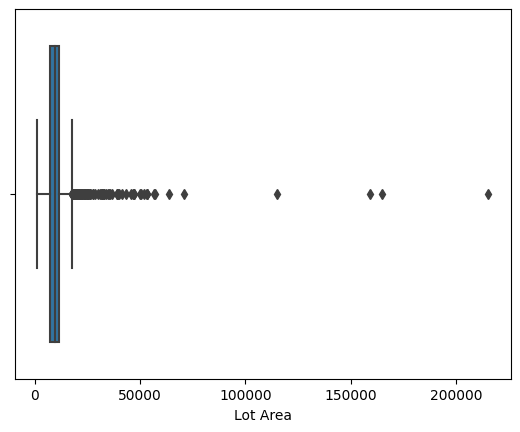

In [120]:
sns.boxplot(x=housing['Lot Area'])

<AxesSubplot:xlabel='SalePrice'>

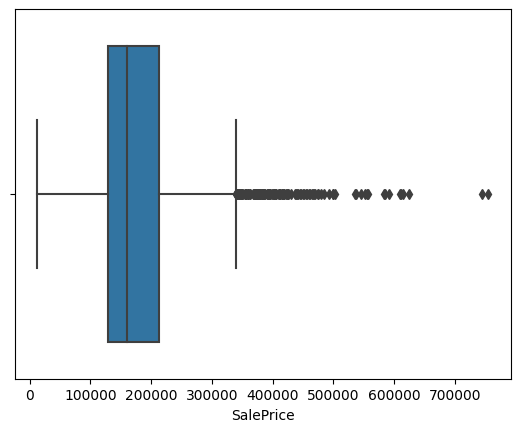

In [121]:
sns.boxplot(x=housing['SalePrice'])

As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'Lot Area' and the 'Sale Price' might be the actual true data points and do not need to be removed.


### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters. 


<AxesSubplot:xlabel='Gr Liv Area'>

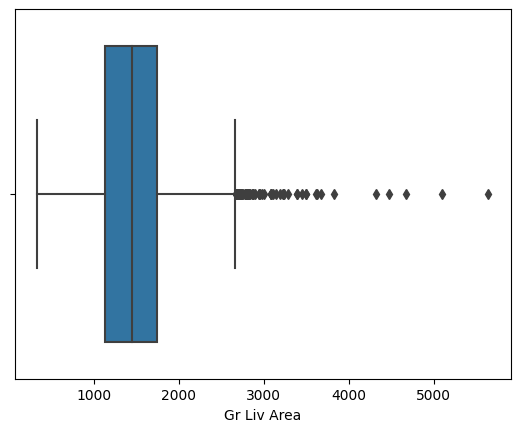

In [123]:
sns.boxplot(x=housing['Gr Liv Area'])

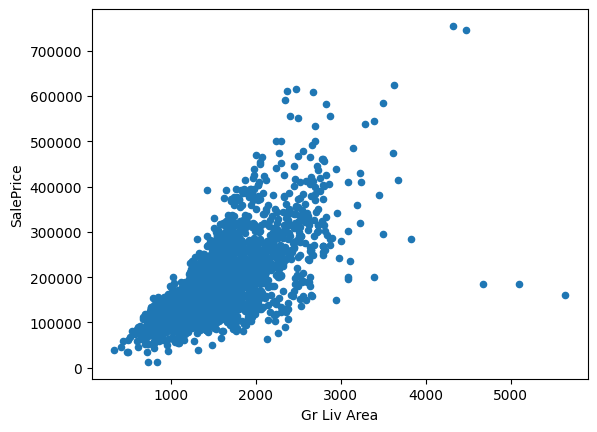

In [122]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

From the above graph, there are three values above 4000 sq. ft. living area that deviate from the rest of the population and do not seem to follow the trend. It can be speculated why this is happening but for the purpose of this lab we can delete them. 

The other two observations on the top are also deviating from the rest of the points but they also seem to be following the trend, so, perhaps, they can be kept.


### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [124]:
out_l=housing[(housing['Gr Liv Area']>4000) & (housing['SalePrice']<300000)].index
out_l

Int64Index([1499, 2181, 2182], dtype='int64')

Now we will use the pandas `drop()` function to remove these two rows.


In [125]:
outliers_dropped = housing.drop(out_l)

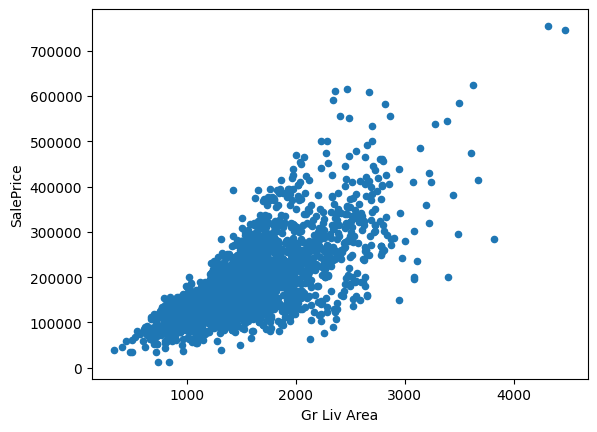

In [126]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

As you can see, we do not have the last two points of the 'Gr Liv Area' anymore.


## Exercise 6


In this exercise, determine whether there are any outliers in the 'Lot Area' feature. You can either plot the box plot for the 'Lot Area', perform a bi-variate analysis by making a scatter plot between the 'SalePrice' and the 'Lot Area', or use the Z-score analysis. If there re any outliers, remove them from the dataset.


<AxesSubplot:xlabel='Lot Area'>

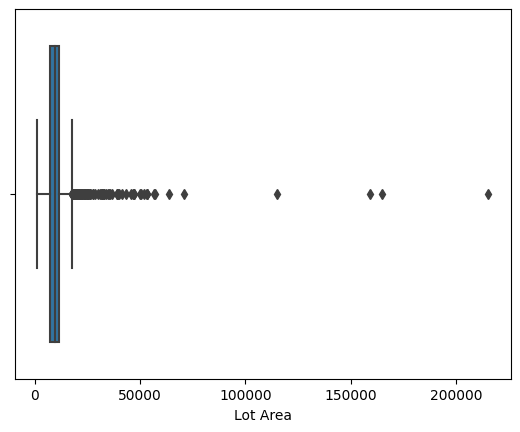

In [127]:
sns.boxplot(x=housing['Lot Area'])

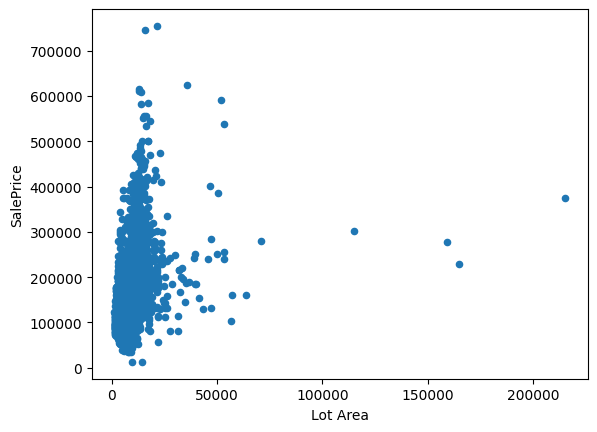

In [128]:
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')

In [129]:
out_l=housing[(housing['Lot Area']>100000) ].index
out_l

Int64Index([957, 1571, 2072, 2116], dtype='int64')

In [130]:
outliers_dropped = housing.drop(out_l)

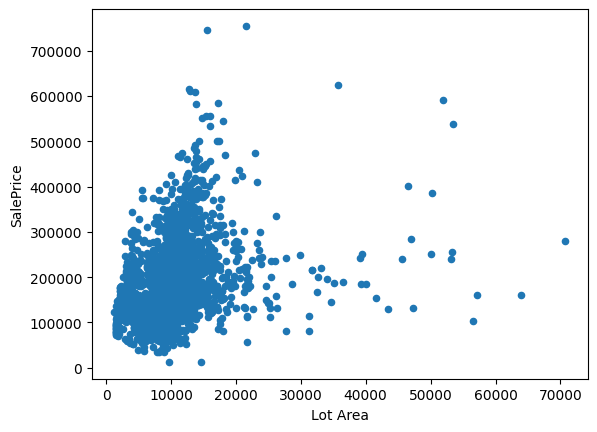

In [131]:
new_plot = outliers_dropped.plot.scatter(x='Lot Area',
                                         y='SalePrice')

## using interquartile range

In [132]:
q1,med,q3=np.percentile(housing['Lot Area'],[25,50,75])
print("Q1=",q1)
print("Q3=",q3)
print("median=",med)
iqr=q3-q1
print("IQR=",iqr)

Q1= 7440.5
Q3= 11556.0
median= 9439.0
IQR= 4115.5


In [133]:
mn=q1 - (1.5*iqr)
mx=q3 + (1.5*iqr)
print(mn,q1,med,q3,mx)

1267.25 7440.5 9439.0 11556.0 17729.25


In [134]:
outliers=housing[housing['Lot Area']>mx]
outliers

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
16,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
19,19,527276150,20,RL,140.0,19138,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,141000
52,52,528218150,20,RL,100.0,18494,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,199500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,2886,913350030,20,RL,69.0,23580,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,242500
2892,2892,916225130,60,RL,42.0,26178,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,335000
2894,2894,916325040,20,RL,68.0,50102,Pave,NaN,IR1,Low,...,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,250764
2904,2904,923125030,20,A (agr),125.0,31250,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,81500


# H,w option 1
* 0-remove duplct
* 1-use minmaxscaler or standrd 
* 2-corr    
* 3-skewde   
* 4-nulls

# option 2
* 0-remove duplct
* 1-use minmaxscaler or standrd 
* 2-skewed
* 3-corr
* 4-nulls